# <center> R2.08 - Statistique descriptive <br> TP 1 bis - Description unidimensionnelle </center>

<center> A. Ridard </center>

L'objectif est de reprendre le TP1, mais avec Python cette fois !

**Deux documents pouvant être utiles :**
-  [<font style="color:blue">Une (très) courte introduction à Python</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Intro_Python.pdf)
- [<font style="color:blue">Un aide-mémoire complet</font>](http://math-ridard.fr/wp-content/contenu_wp/ens_iut/Memento_Pointal.pdf)

**La référence présentée en cours :** 
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

## Importations pour ce TP

In [2]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

> Charger les données du fichier **TP1_Data.xslx** dans un DataFrame.

In [3]:
# importation du fichier Excel
df = pd.read_excel("TP1_Data.xlsx")
print(df)

    id_etudiant specialite_ensibs  dpt_entreprise  dpt_lycee    bac  \
0             9          CyberDef            56.0         35  Bac S   
1            10          CyberDef            22.0         22  Bac S   
2            14          CyberDef            35.0         60  Bac S   
3            19          CyberDef            46.0          7  Bac S   
4            25          CyberLog             NaN         90  Bac S   
..          ...               ...             ...        ...    ...   
88           61          CyberLog             NaN         29  Bac S   
89           53          CyberDef            44.0         41  Bac S   
90           72          CyberDef             NaN         14  Bac S   
91           77          CyberDef            29.0         73  Bac S   
92           89         CyberData             NaN         29  Bac S   

   mention_bac           note_maths_bac                postbac  dpt_postbac  \
0   Assez bien  Entre 10 et 12 (exclus)                DUT R&T      

## Représentations graphiques

*Pour établir les différentes distributions, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) équivalente au regroupement en SQL.*

**Représenter graphiquement**, avec le diagramme le plus adapté (cf. section 5 du livre), la **distribution** :

> des trois spécialités

In [36]:
# Tableau
spe_ensibs = df.groupby("specialite_ensibs")[["id_etudiant","specialite_ensibs"]].count()
print (spe_ensibs)

df . groupby ( "specialite_ensibs" ) [ "gpa_maths_crypto" ] . agg ( [ "mean" , "std" ] )
df . groupby ( "specialite_ensibs" ) [ [ "gpa_maths_crypto" ] ] . describe ( )

                   id_etudiant  specialite_ensibs
specialite_ensibs                                
CyberData                   15                 15
CyberDef                    52                 52
CyberLog                    26                 26


gpa_maths_crypto                                         \
                             count      mean       std  min     25%   50%   
specialite_ensibs                                                           
CyberData                     15.0  2.000000  1.732051  0.0  0.0000  3.00   
CyberDef                      52.0  2.958269  1.034335  0.0  2.9375  3.00   
CyberLog                      26.0  2.903846  1.216711  0.0  2.6250  3.25   

                             
                   75%  max  
specialite_ensibs            
CyberData          3.5  4.0  
CyberDef           3.5  4.0  
CyberLog           3.5  4.0

([<matplotlib.patches.Wedge at 0x7f48dd5fc750>,
 [Text(0.9617812858204877, 0.5338321442602435, 'CyberData'),
  Text(-1.0249278172604361, 0.3994032666438249, 'CyberDef'),
  Text(0.7023109924553718, -0.8466163652306461, 'CyberLog')],
 [Text(0.5246079740839024, 0.2911811695964964, '16.1%'),
  Text(-0.5590515366875105, 0.2178563272602681, '55.9%'),
  Text(0.38307872315747543, -0.46179074467126147, '28.0%')])

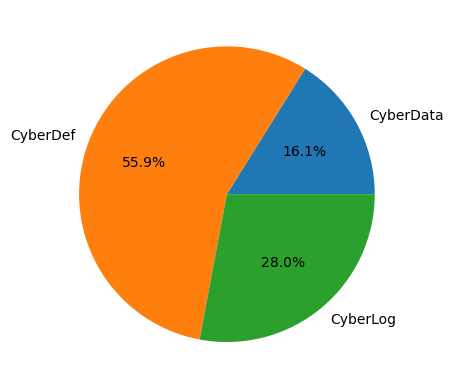

In [73]:
# Graphique
plt.pie(spe_ensibs['id_etudiant'], labels=spe_ensibs.index ,autopct='%1.1f%%')

> des bacs **toute spécialité confondue**

In [74]:
# Tableau
bacs = df.groupby("bac")[["id_etudiant"]].count()
print (bacs)

           id_etudiant
bac                   
Bac ES               2
Bac Pro              3
Bac S               80
Bac STHR             1
Bac STI2D            7


([<matplotlib.patches.Wedge at 0x7f48dd4f1b50>,
 [Text(1.0974904761527504, 0.07426072147514642, 'Bac ES'),
  Text(1.0693896691445077, 0.25769310337492585, 'Bac Pro'),
  Text(-1.0943562599744148, 0.1112851124580958, 'Bac S'),
  Text(0.9617813217443093, -0.5338320795379101, 'Bac STHR'),
  Text(1.0693896917635377, -0.25769300950915597, 'Bac STI2D')],
 [Text(0.5986311688105911, 0.04050584807735259, '2.2%'),
  Text(0.5833034558970042, 0.14055987456814137, '3.2%'),
  Text(-0.5969215963496808, 0.060700970431688615, '86.0%'),
  Text(0.5246079936787141, -0.2911811342934055, '1.1%'),
  Text(0.5833034682346568, -0.14055982336863052, '7.5%')])

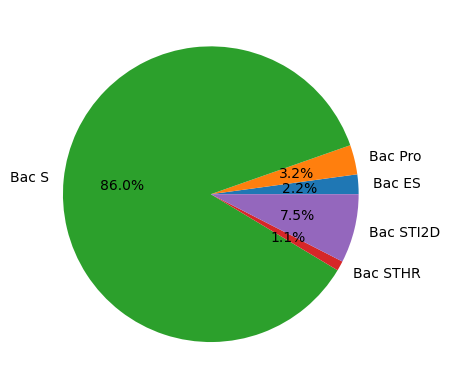

In [75]:
# Graphique
plt.pie(bacs['id_etudiant'], labels=bacs.index ,autopct='%1.1f%%')

> des bacs pour chacune des spécialités

In [94]:
# Tableau
bacs = df.groupby(["specialite_ensibs", "bac"])[["id_etudiant"]].count()
print(bacs)

                             id_etudiant
specialite_ensibs bac                   
CyberData         Bac ES               1
                  Bac S               14
CyberDef          Bac Pro              3
                  Bac S               42
                  Bac STHR             1
                  Bac STI2D            6
CyberLog          Bac ES               1
                  Bac S               24
                  Bac STI2D            1


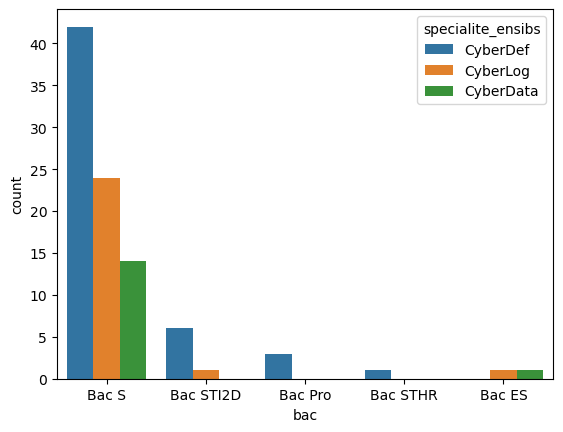

In [93]:
# Graphique
sns.countplot(x='bac', hue='specialite_ensibs', data=df)
#plt.legend()
plt.show()

> des mentions **au bac S**

In [99]:
# Tableau
bac_s = df[df["bac"] == "Bac S"].groupby("mention_bac")
bac_s["id_etudiant"].count()

mention_bac
Assez bien    37
Bien          27
Passable       8
Très bien      8
Name: id_etudiant, dtype: int64

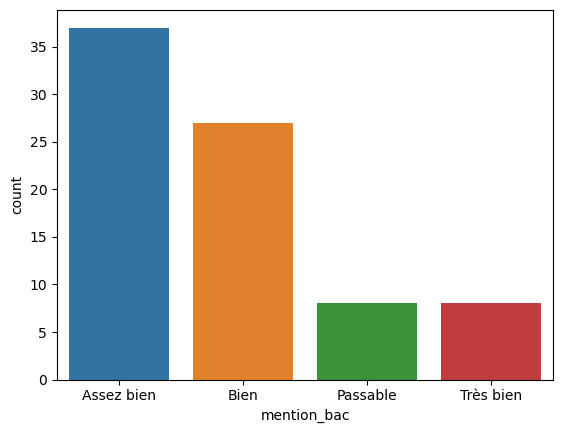

In [100]:
# Graphique
sns.countplot(x='mention_bac', data=df[df["bac"] == "Bac S"])
#plt.legend()
plt.show()

> des mentions **au bac S** pour chacune des spécialités

In [102]:
# Tableau
bac_s = df[df["bac"] == "Bac S"].groupby(["mention_bac", "specialite_ensibs"])
bac_s["id_etudiant"].count()

mention_bac  specialite_ensibs
Assez bien   CyberData             8
             CyberDef             16
             CyberLog             13
Bien         CyberData             4
             CyberDef             16
             CyberLog              7
Passable     CyberData             1
             CyberDef              5
             CyberLog              2
Très bien    CyberData             1
             CyberDef              5
             CyberLog              2
Name: id_etudiant, dtype: int64

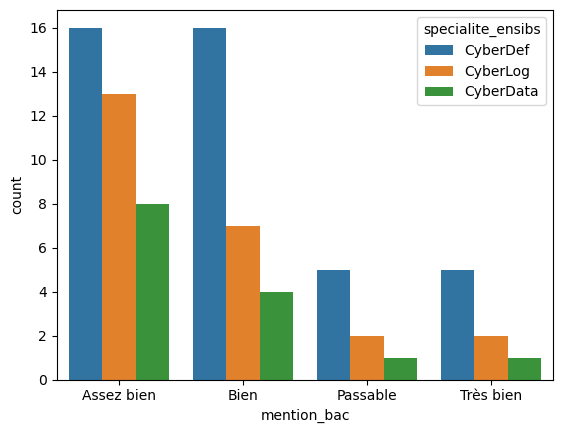

In [104]:
sns.countplot(x='mention_bac', hue="specialite_ensibs" ,data=df[df["bac"] == "Bac S"])
#plt.legend()
plt.show()

> des formations postbac

In [7]:
# Tableau
post_bac = df.groupby("postbac")[["id_etudiant"]].count()
print (post_bac)

                       id_etudiant
postbac                           
Autre                           11
DUT INFO                        36
DUT R&T                         23
Prépa concours (CPGE)           14
Prépa intégrée (PEI)             9


([<matplotlib.patches.Wedge at 0x7f4060f1c250>,
 [Text(1.0249278266091442, 0.3994032426536578, 'Autre'),
  Text(-0.41665673061351954, 1.018035936907167, 'DUT INFO'),
  Text(-0.7578636675697359, -0.7972720121625674, 'DUT R&T'),
  Text(0.5175119842003474, -0.9706602630215267, 'Prépa concours (CPGE)'),
  Text(1.049553169608102, -0.3292994748941863, 'Prépa intégrée (PEI)')],
 [Text(0.5590515417868058, 0.2178563141747224, '11.8%'),
  Text(-0.22726730760737426, 0.5552923292220909, '38.7%'),
  Text(-0.41338018231076495, -0.434875642997764, '24.7%'),
  Text(0.28227926410928034, -0.5294510525571964, '15.1%'),
  Text(0.5724835470589646, -0.1796178953968289, '9.7%')])

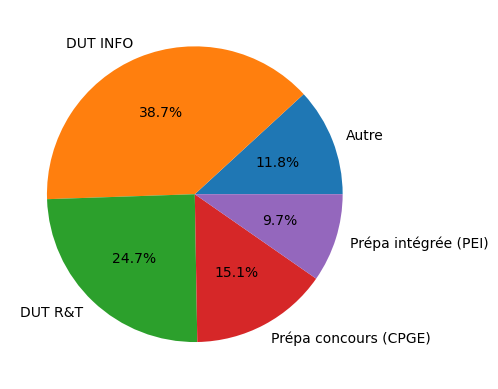

In [8]:
# Graphique
plt.pie(post_bac['id_etudiant'], labels=post_bac.index ,autopct='%1.1f%%')

> des formations postbac pour chacune des spécialités

In [9]:
# Tableau
postbac_spe = df.groupby(["specialite_ensibs", "postbac"])[["id_etudiant"]].count()
print(postbac_spe)

                                         id_etudiant
specialite_ensibs postbac                           
CyberData         Autre                            4
                  DUT INFO                         7
                  DUT R&T                          2
                  Prépa intégrée (PEI)             2
CyberDef          Autre                            4
                  DUT INFO                        23
                  DUT R&T                         20
                  Prépa concours (CPGE)            1
                  Prépa intégrée (PEI)             4
CyberLog          Autre                            3
                  DUT INFO                         6
                  DUT R&T                          1
                  Prépa concours (CPGE)           13
                  Prépa intégrée (PEI)             3


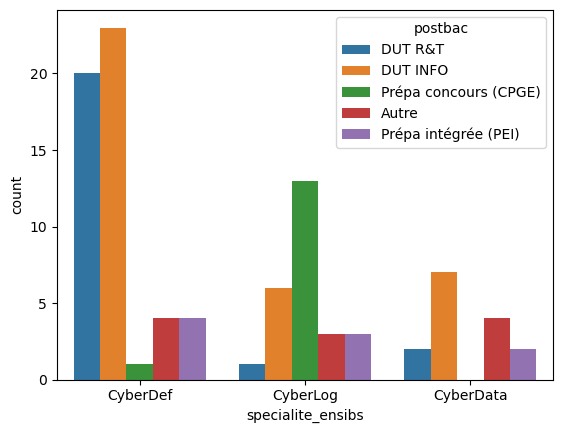

In [11]:
# Graphique
sns.countplot(hue='postbac', x='specialite_ensibs', data=df)
plt.show()

> des formations postbac pour chacune des mentions **au bac S**

In [12]:
# Tableau
bacs = df[df["bac"] == "Bac S"].groupby(["mention_bac", "postbac"])[["id_etudiant"]].count()
print(bacs)

                                   id_etudiant
mention_bac postbac                           
Assez bien  Autre                            6
            DUT INFO                        12
            DUT R&T                         11
            Prépa concours (CPGE)            5
            Prépa intégrée (PEI)             3
Bien        DUT INFO                        14
            DUT R&T                          2
            Prépa concours (CPGE)            6
            Prépa intégrée (PEI)             5
Passable    Autre                            2
            DUT INFO                         3
            DUT R&T                          3
Très bien   Autre                            1
            DUT INFO                         3
            DUT R&T                          1
            Prépa concours (CPGE)            2
            Prépa intégrée (PEI)             1


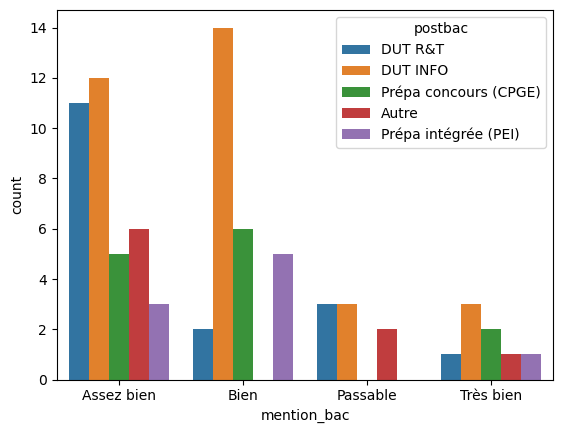

In [13]:
# Graphique
sns.countplot(x='mention_bac', hue="postbac" ,data=df[df["bac"] == "Bac S"])
plt.show()

> des départements du lycée

In [14]:
# Tableau
dpt_lycee = df.groupby("dpt_lycee")[["id_etudiant"]].count()
print (dpt_lycee)

           id_etudiant
dpt_lycee             
6                    1
7                    1
14                   3
22                   7
26                   2
28                   1
29                   5
30                   1
32                   1
33                   2
35                  10
37                   1
41                   3
44                   4
45                   1
51                   1
54                   1
56                  12
57                   2
59                   2
60                   2
63                   2
67                   2
69                   3
73                   1
75                   3
76                   3
78                   1
79                   1
83                   1
85                   1
86                   1
88                   2
89                   1
90                   1
91                   1
92                   1
93                   1
95                   1
98                   1
99                   1
974        

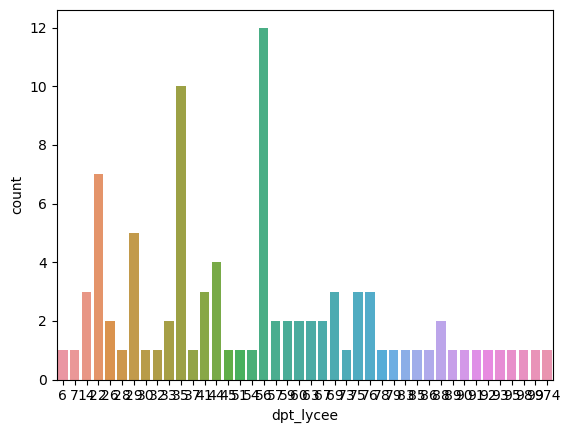

In [16]:
# Graphique
sns.countplot(x='dpt_lycee', data=df)
plt.show()

> des étudiants qui n'ont pas changé de département pour leur formation postbac

In [19]:
# Tableau
same_dpt_lycee = df[df["dpt_lycee"] == df["dpt_postbac"]].groupby("dpt_lycee")[["id_etudiant"]].count()

In [51]:
# Graphique

> des notes de maths au bac

In [52]:
# Tableau

In [53]:
# Graphique

> des notes de maths au bac pour chacune des spécialités

In [54]:
# Tableau

In [55]:
# Graphique

> des notes de protocoles en cryptographie

In [56]:
# Tableau

In [57]:
# Graphique

> des notes de protocoles en cryptographie pour chacune des spécialités

In [58]:
# Tableau

In [59]:
# Graphique

> des notes de protocoles en cryptographie pour chacune des formations postbac

In [60]:
# Tableau

In [61]:
# Graphique

## Indicateurs statistiques

*Là encore, on pourra utiliser la méthode **.groupby()** (cf. section 4.5 du livre) accompagnée de **.agg()**.*

**Calculer** :

> le nombre d'étudiants pour chacune des spécialités

In [33]:
# Réponse
# Claculer le nombre d'étudiants pour chacune des spécialités
spe_ensibs = df.groupby("specialite_ensibs")[["id_etudiant"]].agg(["count"])
print(spe_ensibs)

                  id_etudiant
                        count
specialite_ensibs            
CyberData                  15
CyberDef                   52
CyberLog                   26


> la moyenne et l'écart-type des notes de protocoles en cryptographie

In [36]:
# Réponse
# Calculer la moyenne et l'écart-type des notes de protocoles en cryptographie
avg_std_notes = df[["gpa_protocoles_crypto"]].agg(["mean", "std"])
print(avg_std_notes)

      gpa_protocoles_crypto
mean               3.236957
std                0.496320


> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des spécialités

In [37]:
# Réponse
avg_std_notes_spe = df.groupby("specialite_ensibs")[["gpa_protocoles_crypto"]].agg(["mean", "std"])
print(avg_std_notes_spe)

                  gpa_protocoles_crypto          
                                   mean       std
specialite_ensibs                                
CyberData                      2.870000  0.806181
CyberDef                       3.285192  0.360405
CyberLog                       3.356800  0.417978


> la moyenne et l'écart-type des notes de protocoles en cryptographie pour chacune des formations postbac

In [39]:
# Réponse
avg_std_notes_postbac = df.groupby("postbac")[["gpa_protocoles_crypto"]].agg(["mean", "std"])
print(avg_std_notes_postbac)

                      gpa_protocoles_crypto          
                                       mean       std
postbac                                              
Autre                              3.210000  0.249239
DUT INFO                           3.152857  0.656298
DUT R&T                            3.304348  0.367087
Prépa concours (CPGE)              3.374286  0.490443
Prépa intégrée (PEI)               3.211111  0.231541


> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto

In [48]:
# Réponse
def avg_extremes(x):
	return (np.min(x) + np.max(x)) / 2

def span(x):
	return np.max(x) - np.min(x)

avg_extremes_span = df.groupby("id_etudiant")[["gpa_maths_crypto"]].agg([avg_extremes, span])
print(avg_extremes_span)

            gpa_maths_crypto     
                avg_extremes span
id_etudiant                      
1                       4.00  0.0
2                       2.50  0.0
3                       3.50  0.0
4                       3.00  0.0
5                       2.75  0.0
...                      ...  ...
89                      0.00  0.0
90                      4.00  0.0
91                      0.00  0.0
92                      3.00  0.0
93                      3.50  0.0

[93 rows x 2 columns]


> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des spécialités

In [67]:
# Réponse

> la moyenne des extrêmes et l'étendue des notes de maths pour la crypto pour chacune des formations postbac

In [68]:
# Réponse

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac

In [51]:
# Réponse

dict_approx_note = {
	"Entre 4 et 8 (inclus)" : 6,
	"Entre 8 et 12 (inclus)" : 10,
	"Entre 12 et 16 (inclus)" : 14,
	"Entre 16 et 18 (inclus)" : 18
}

series_approx_note = pd.Series(dict_approx_note)
df_approx_note = pd.DataFrame(series_approx_note, columns=["app_notes_maths_bac"])
print(df_approx_note)

df_data_approx_note = pd.merge(
	df[["note_maths_bac"]],
	df_approx_note,
	left_on="note_maths_bac",
	right_index=True,
	how="inner"
)
print(df_data_approx_note)

numCol = df.columns.get_loc("note_maths_bac")
df.insert(numCol + 1, "notes_maths_bac", df_data_approx_note["app_notes_maths_bac"])
df.head()

                         app_notes_maths_bac
Entre 4 et 8 (inclus)                      6
Entre 8 et 12 (inclus)                    10
Entre 12 et 16 (inclus)                   14
Entre 16 et 18 (inclus)                   18
Empty DataFrame
Columns: [note_maths_bac, app_notes_maths_bac]
Index: []


ValueError: cannot insert notes_maths_bac, already exists

> la moyenne "approchée" et l'écart-type "approché" des notes de maths au bac pour chacune des spécialités

In [70]:
# Réponse

## Des questions supplémentaires (non facultatives)

*Pour les questions suivantes, on pourra se reporter à la section 4.4 du livre*

> Afficher les différents indicateurs, à l'aide de la méthode **.describe()**, pour les notes de protocoles en crypto et celles de maths pour la crypto

In [ ]:
# Réponse

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des spécialités

In [ ]:
# Réponse

> Afficher ces différents indicateurs pour les notes de protocoles en crypto dans chacune des formations postbac en se restreignant à CyberDef

In [ ]:
# Réponse

> Afficher le 1er et le 9ème décile, le coefficient d'asymétrie et celui d'applatissement pour les notes de protocoles en crypto

In [ ]:
# Réponse